# Data 622
## Assignment 1
Mark Ly

Student ID: 00504696

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn imports
# sklearn preprocessing
from sklearn import preprocessing

# sklearn model selection and metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn import metrics

# classifier
from sklearn.svm import SVC

### Features
After loading all of our packages we will then read the Cervical Cancer dataset from the UCI Machine Learning
Repository using pandas. We then want to select all the continuous variables to use in our SVC model. To determine
which variables are continuous or not, we consulted the datasets webpage and selected all the variables that were not
 booleans. (Age, Number of sexual partners, First Sexual intercourse (age), Num of pregnancies, Hormonal
 contraceptives (years), IUD (years), STDs (number),STDs: Number of diagnosis, STDs: Times since first diagnosis and,
 STDs:time since last diagnosis).

Instead of selection based on the name, we put all the column names in a list and then determine their integer
location based on that list to subset our data.

In [40]:
# Loading data and selecting the continuous variables
df_cc = pd.read_csv("risk_factors_cervical_cancer.csv", na_values="?")
df_cc.head()
list(df_cc.columns)
cc_selected = df_cc.iloc[:,[0,1,2,3,8,10,12,25,26,27]]
cc_selected.shape  # 858, 10

(858, 10)

### Target Variable
The target variable is the binary variable biopsy which we will store in another dataframe and check for any missing
values.

In [41]:
y = df_cc['Biopsy']
y.describe() # 858 entries, no missing values

count    858.000000
mean       0.064103
std        0.245078
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Biopsy, dtype: float64

### Data pre-processing
The biopsy dataframe has no missing values since it has 858 entries, However our other dataframe has missing values
for all the columns except for Age and STDs: Number of diagnosis. We will impute the missing values with the
median values and then scale each feature to be a zero mean and a unit variance of

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis
count,858.000000,832.000000,851.000000,802.000000,750.000000,741.000000,753.000000,858.000000,71.000000,71.000000
mean,26.820513,2.527644,16.995300,2.275561,2.256419,0.514804,0.176627,0.087413,6.140845,5.816901
std,8.497948,1.667760,2.803355,1.447414,3.764254,1.943089,0.561993,0.302545,5.895024,5.755271
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
50%,25.000000,2.000000,17.000000,2.000000,0.500000,0.000000,0.000000,0.000000,4.000000,3.000000
75%,32.000000,3.000000,18.000000,3.000000,3.000000,0.000000,0.000000,0.000000,8.000000,7.500000
max,84.000000,28.000000,32.000000,11.000000,30.000000,19.000000,4.000000,3.000000,22.000000,22.000000


<AxesSubplot:>

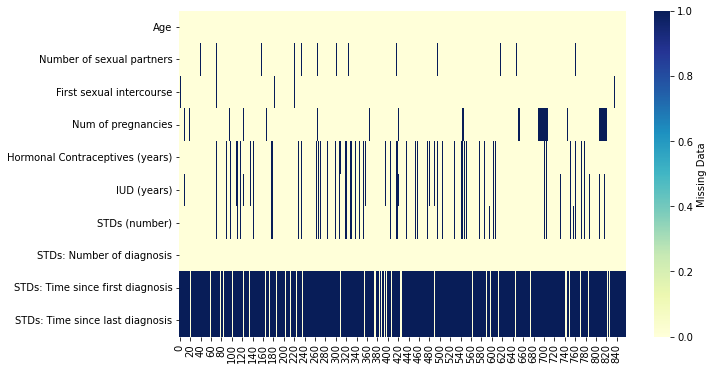

In [42]:
# checking for missing variables. Any column that has less than 858 for the count is missing values
display(cc_selected.describe())

# Using a heat map to check for missing data
plt.figure(figsize=(10,6))
sns.heatmap(cc_selected.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

,Age,NumPartners,FirstSex,NumPreg,HormoneContraYear,IUDYear,STDNumber,NumDiag,FirstDiag,LastDiag
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,2.035331,0.444604,0.155012,0.087413,4.177156,3.233100
std,8.497948,1.644759,2.791883,1.400981,3.567040,1.814218,0.529617,0.302545,1.785156,1.818927
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000
50%,25.000000,2.000000,17.000000,2.000000,0.500000,0.000000,0.000000,0.000000,4.000000,3.000000
75%,32.000000,3.000000,18.000000,3.000000,2.000000,0.000000,0.000000,0.000000,4.000000,3.000000
max,84.000000,28.000000,32.000000,11.000000,30.000000,19.000000,4.000000,3.000000,22.000000,22.000000


<AxesSubplot:>

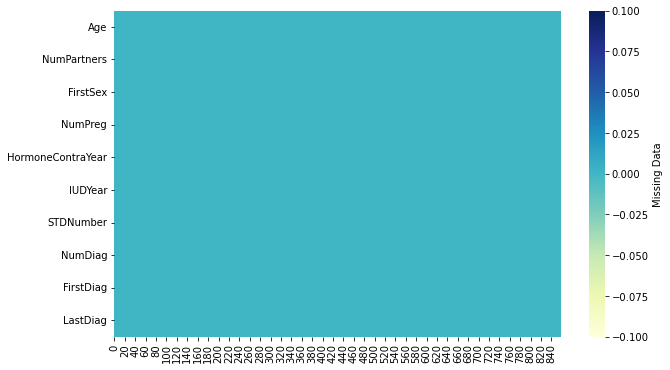

In [43]:
from sklearn.impute import SimpleImputer

# renaming columns
cc_cols = {0:'Age',1:'NumPartners',2:'FirstSex',3:'NumPreg',4:'HormoneContraYear',5:'IUDYear',6:'STDNumber',7:'NumDiag',
           8:'FirstDiag',9:'LastDiag'}

# using sklearns SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(cc_selected)
cc_selected_imp = pd.DataFrame(imp.transform(cc_selected))

# applying new column names
cc_selected_imp.rename(columns=cc_cols,inplace=True)
display(cc_selected_imp.describe())

plt.figure(figsize=(10,6))
sns.heatmap(cc_selected_imp.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [44]:
from sklearn import preprocessing
# Scale each feature to be zero mean and unit variance
X = preprocessing.scale(cc_selected_imp)
X1 = pd.DataFrame(X)
X1.describe()

,0,1,2,3,4,5,6,7,8,9
count,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02
mean,3.524117e-16,-3.881899e-18,3.364312e-16,1.048113e-16,-2.714741e-16,6.320378e-16,9.471833e-17,-9.264798e-17,-2.208477e-16,-1.837432e-17
std,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00
min,-1.627284e+00,-9.196100e-01,-2.507060e+00,-1.612364e+00,-5.709267e-01,-2.452093e-01,-2.928571e-01,-2.890930e-01,-1.780802e+00,-1.228418e+00
25%,-8.030752e-01,-3.112635e-01,-7.151094e-01,-8.981627e-01,-5.709267e-01,-2.452093e-01,-2.928571e-01,-2.890930e-01,-9.929636e-02,-1.282274e-01
50%,-2.143546e-01,-3.112635e-01,1.670816e-03,-1.839610e-01,-4.306727e-01,-2.452093e-01,-2.928571e-01,-2.890930e-01,-9.929636e-02,-1.282274e-01
75%,6.098541e-01,2.970830e-01,3.600609e-01,5.302406e-01,-9.910759e-03,-2.452093e-01,-2.928571e-01,-2.890930e-01,-9.929636e-02,-1.282274e-01
max,6.732547e+00,1.550575e+01,5.377522e+00,6.243854e+00,7.844313e+00,1.023373e+01,7.264177e+00,9.632579e+00,9.989737e+00,1.032359e+01


### Data pre-processing
Now that we have wrangled all of our data, we can begin to split our data into training and testing data. We aim to
have 70% of our data in training and 30% for testing. To change this value we can use the test_size parameter. We will
select a random seed (824) in order to reproduce our results. Since we have 858 rows, we expect 600 to be in the
training and 258 to be in our testing.

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=268 ,shuffle=True)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(600, 10)
(600,)
(258, 10)
(258,)


### Hyperparameter tuning
Since we don't know which is the best kernel to use for SVC, we will be using the GridSearch function and determine
the best kernel based on the F1 score from a 5-fold cross-validation

In [46]:
from sklearn.svm import SVC

param_grid = [{'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}]
gs = GridSearchCV(SVC(probability=True, gamma='scale'), param_grid, cv=5, scoring='f1')
gs.fit(X_train, y_train)
gs.cv_results_

{'mean_fit_time': array([0.01576405, 0.03020544, 0.01924028, 0.01495042]),
 'std_fit_time': array([0.00222526, 0.00147873, 0.0007639 , 0.00140191]),
 'mean_score_time': array([0.00199199, 0.0029933 , 0.0017591 , 0.00199885]),
 'std_score_time': array([6.32048022e-04, 1.96439548e-05, 7.30866520e-04, 8.33224328e-06]),
 'param_kernel': masked_array(data=['linear', 'rbf', 'poly', 'sigmoid'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'linear'},
  {'kernel': 'rbf'},
  {'kernel': 'poly'},
  {'kernel': 'sigmoid'}],
 'split0_test_score': array([0., 0., 0., 0.]),
 'split1_test_score': array([0., 0., 0., 0.]),
 'split2_test_score': array([0.        , 0.        , 0.14285714, 0.        ]),
 'split3_test_score': array([0., 0., 0., 0.]),
 'split4_test_score': array([0., 0., 0., 0.]),
 'mean_test_score': array([0.        , 0.        , 0.02857143, 0.        ]),
 'std_test_score': array([0.        , 0.        , 0.05714286,

In [47]:
# best kernel
gs.best_params_

{'kernel': 'poly'}

In [48]:
y_pred = gs.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred[:,1], pos_label=1)
print(metrics.auc(fpr, tpr))

0.5057613168724279


In [49]:
clf = SVC(probability=True, kernel='poly',class_weight='balanced')
clf.fit(X,y)
y_pred = clf.predict(X_test)
perf_clf = cross_validate(clf, X, y, cv=5, scoring=['f1', 'precision', 'recall', 'roc_auc', 'balanced_accuracy'], return_train_score=True)
perf_clf

{'fit_time': array([0.13463926, 0.12865448, 0.11868382, 0.11968374, 0.1396265 ]),
 'score_time': array([0.01496029, 0.01495934, 0.01296425, 0.0129621 , 0.01795316]),
 'test_f1': array([0.07142857, 0.13333333, 0.        , 0.37037037, 0.        ]),
 'train_f1': array([0.46875   , 0.45977011, 0.53488372, 0.41860465, 0.46666667]),
 'test_precision': array([0.05882353, 0.25      , 0.        , 0.3125    , 0.        ]),
 'train_precision': array([0.75      , 0.46511628, 0.54761905, 0.42857143, 0.45652174]),
 'test_recall': array([0.09090909, 0.09090909, 0.        , 0.45454545, 0.        ]),
 'train_recall': array([0.34090909, 0.45454545, 0.52272727, 0.40909091, 0.47727273]),
 'test_roc_auc': array([0.52907962, 0.54206663, 0.33258046, 0.646875  , 0.43068182]),
 'train_roc_auc': array([0.83689111, 0.81044676, 0.84701572, 0.82426128, 0.81208469]),
 'test_balanced_accuracy': array([0.4957651 , 0.53613778, 0.47826087, 0.69289773, 0.471875  ]),
 'train_balanced_accuracy': array([0.66656046, 0.70935

In [53]:
print('''
auc: {},
f1 score: {},
precision: {},
recall: {},
balanced accuracy {}
'''.format(metrics.auc(fpr, tpr),
      metrics.f1_score(y_test,y_pred),
      metrics.precision_score(y_test,y_pred),
      metrics.recall_score(y_test,y_pred),
      metrics.balanced_accuracy_score(y_test,y_pred)))



auc: 0.5057613168724279,
f1 score: 0.3571428571428571,
precision: 0.38461538461538464,
recall: 0.3333333333333333,
balanced accuracy 0.6502057613168725

